# Regression Analysis on Life Expectancy of Different Countries

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats


In [47]:
df=pd.read_csv("led.csv")

columns_to_remove = ['Country', 'Year','Status']
df= df.drop(columns=columns_to_remove)
df=df.dropna()


In [5]:
df.head()

Lifeexpectancy  AdultMortality  infantdeaths  Alcohol  \
0            65.0           263.0            62     0.01   
1            59.9           271.0            64     0.01   
2            59.9           268.0            66     0.01   
3            59.5           272.0            69     0.01   
4            59.2           275.0            71     0.01   

   percentageexpenditure  HepatitisB  Measles   BMI  under-fivedeaths  Polio  \
0              71.279624        65.0     1154  19.1                83    6.0   
1              73.523582        62.0      492  18.6                86   58.0   
2              73.219243        64.0      430  18.1                89   62.0   
3              78.184215        67.0     2787  17.6                93   67.0   
4               7.097109        68.0     3013  17.2                97   68.0   

   Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0              8.16        65.0       0.1  584.259210  33736494.0   
1              8.18        62.0       0.1  612.696514    327582.0   
2              8.13        64.0       0.1  631.744976  31731688.0   
3              8.52        67.0       0.1  669.959000   3696958.0   
4              7.87        68.0       0.1   63.537231   2978599.0   

   thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0               17.2              17.3                         0.479   
1               17.5              17.5                         0.476   
2               17.7              17.7                         0.470   
3               17.9              18.0                         0.463   
4               18.2              18.2                         0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Lifeexpectancy                1649 non-null   float64
 1   AdultMortality                1649 non-null   float64
 2   infantdeaths                  1649 non-null   int64  
 3   Alcohol                       1649 non-null   float64
 4   percentageexpenditure         1649 non-null   float64
 5   HepatitisB                    1649 non-null   float64
 6   Measles                       1649 non-null   int64  
 7   BMI                           1649 non-null   float64
 8   under-fivedeaths              1649 non-null   int64  
 9   Polio                         1649 non-null   float64
 10  Totalexpenditure              1649 non-null   float64
 11  Diphtheria                    1649 non-null   float64
 12  HIV/AIDS                      1649 non-null   float64
 13  GDP     

Frequency Distribution:
 Lifeexpectancy
44.0    1
44.3    1
44.5    2
44.6    2
44.8    2
       ..
85.0    5
86.0    8
87.0    3
88.0    6
89.0    7
Name: count, Length: 320, dtype: int64


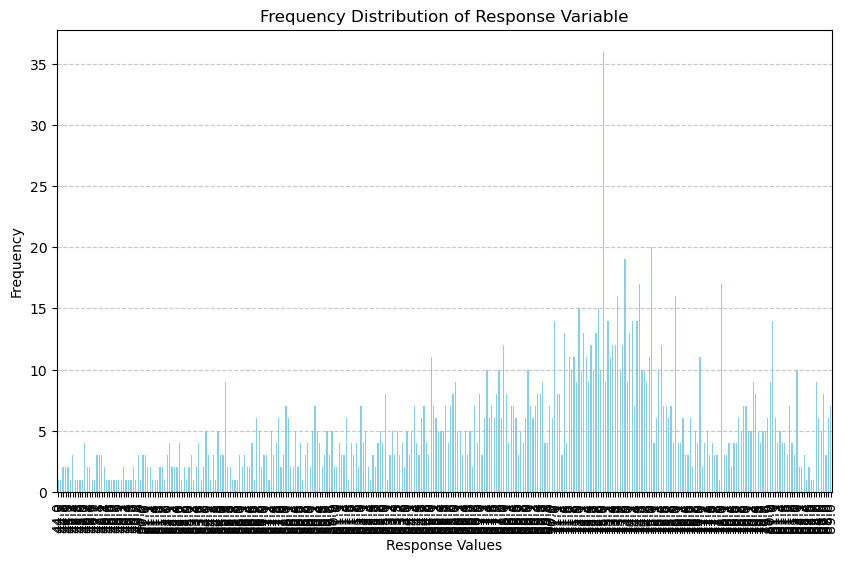

In [48]:
X = df.drop(columns = ['Lifeexpectancy'])

# Dependent variable (target)
Y = df['Lifeexpectancy']
frequency_distribution = df['Lifeexpectancy'].value_counts().sort_index()

# Print frequency distribution
print("Frequency Distribution:\n", frequency_distribution)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Response Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Response Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check for Linearity

In [49]:
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(Y, X).fit()

# Get the summary of the model
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     457.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:27:24   Log-Likelihood:                -4440.6
No. Observations:                1649   AIC:                             8919.
Df Residuals:                    1630   BIC:                             9022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

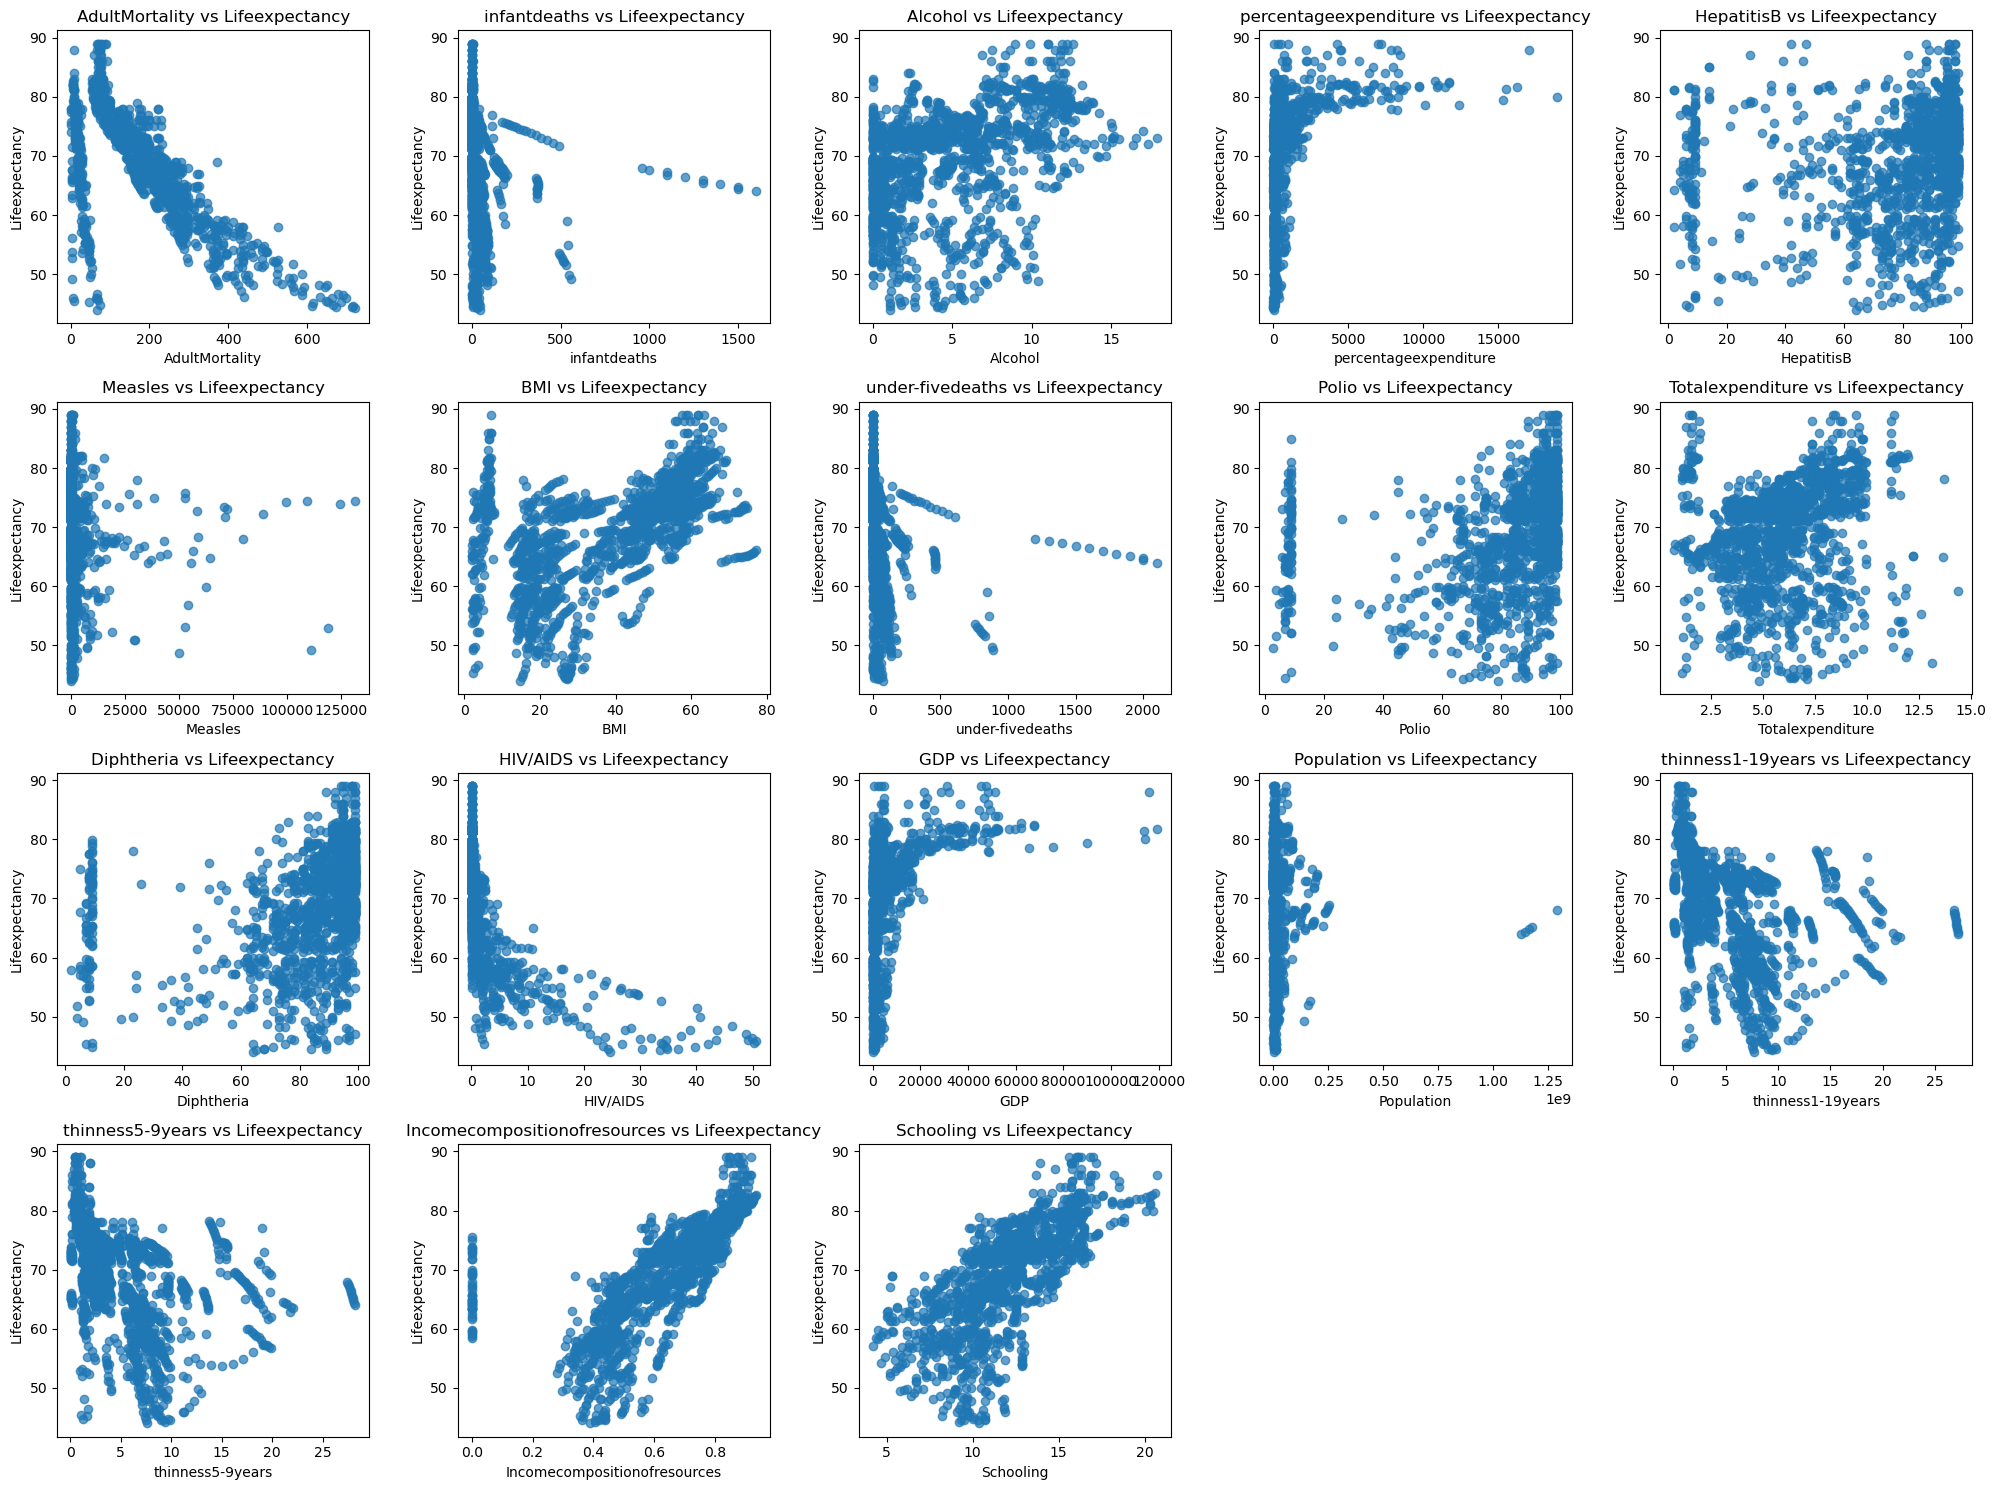

In [50]:
response = 'Lifeexpectancy'
predictors =  [
    'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure',
    'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
    'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling'
]

num_predictors = len(predictors)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

for i, predictor in enumerate(predictors):
    row, col = divmod(i, 5)
    axes[row, col].scatter(df[predictor], df[response], alpha=0.7)
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel(response)
    axes[row, col].set_title(f'{predictor} vs {response}')

# Remove empty subplots if any
for j in range(num_predictors, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

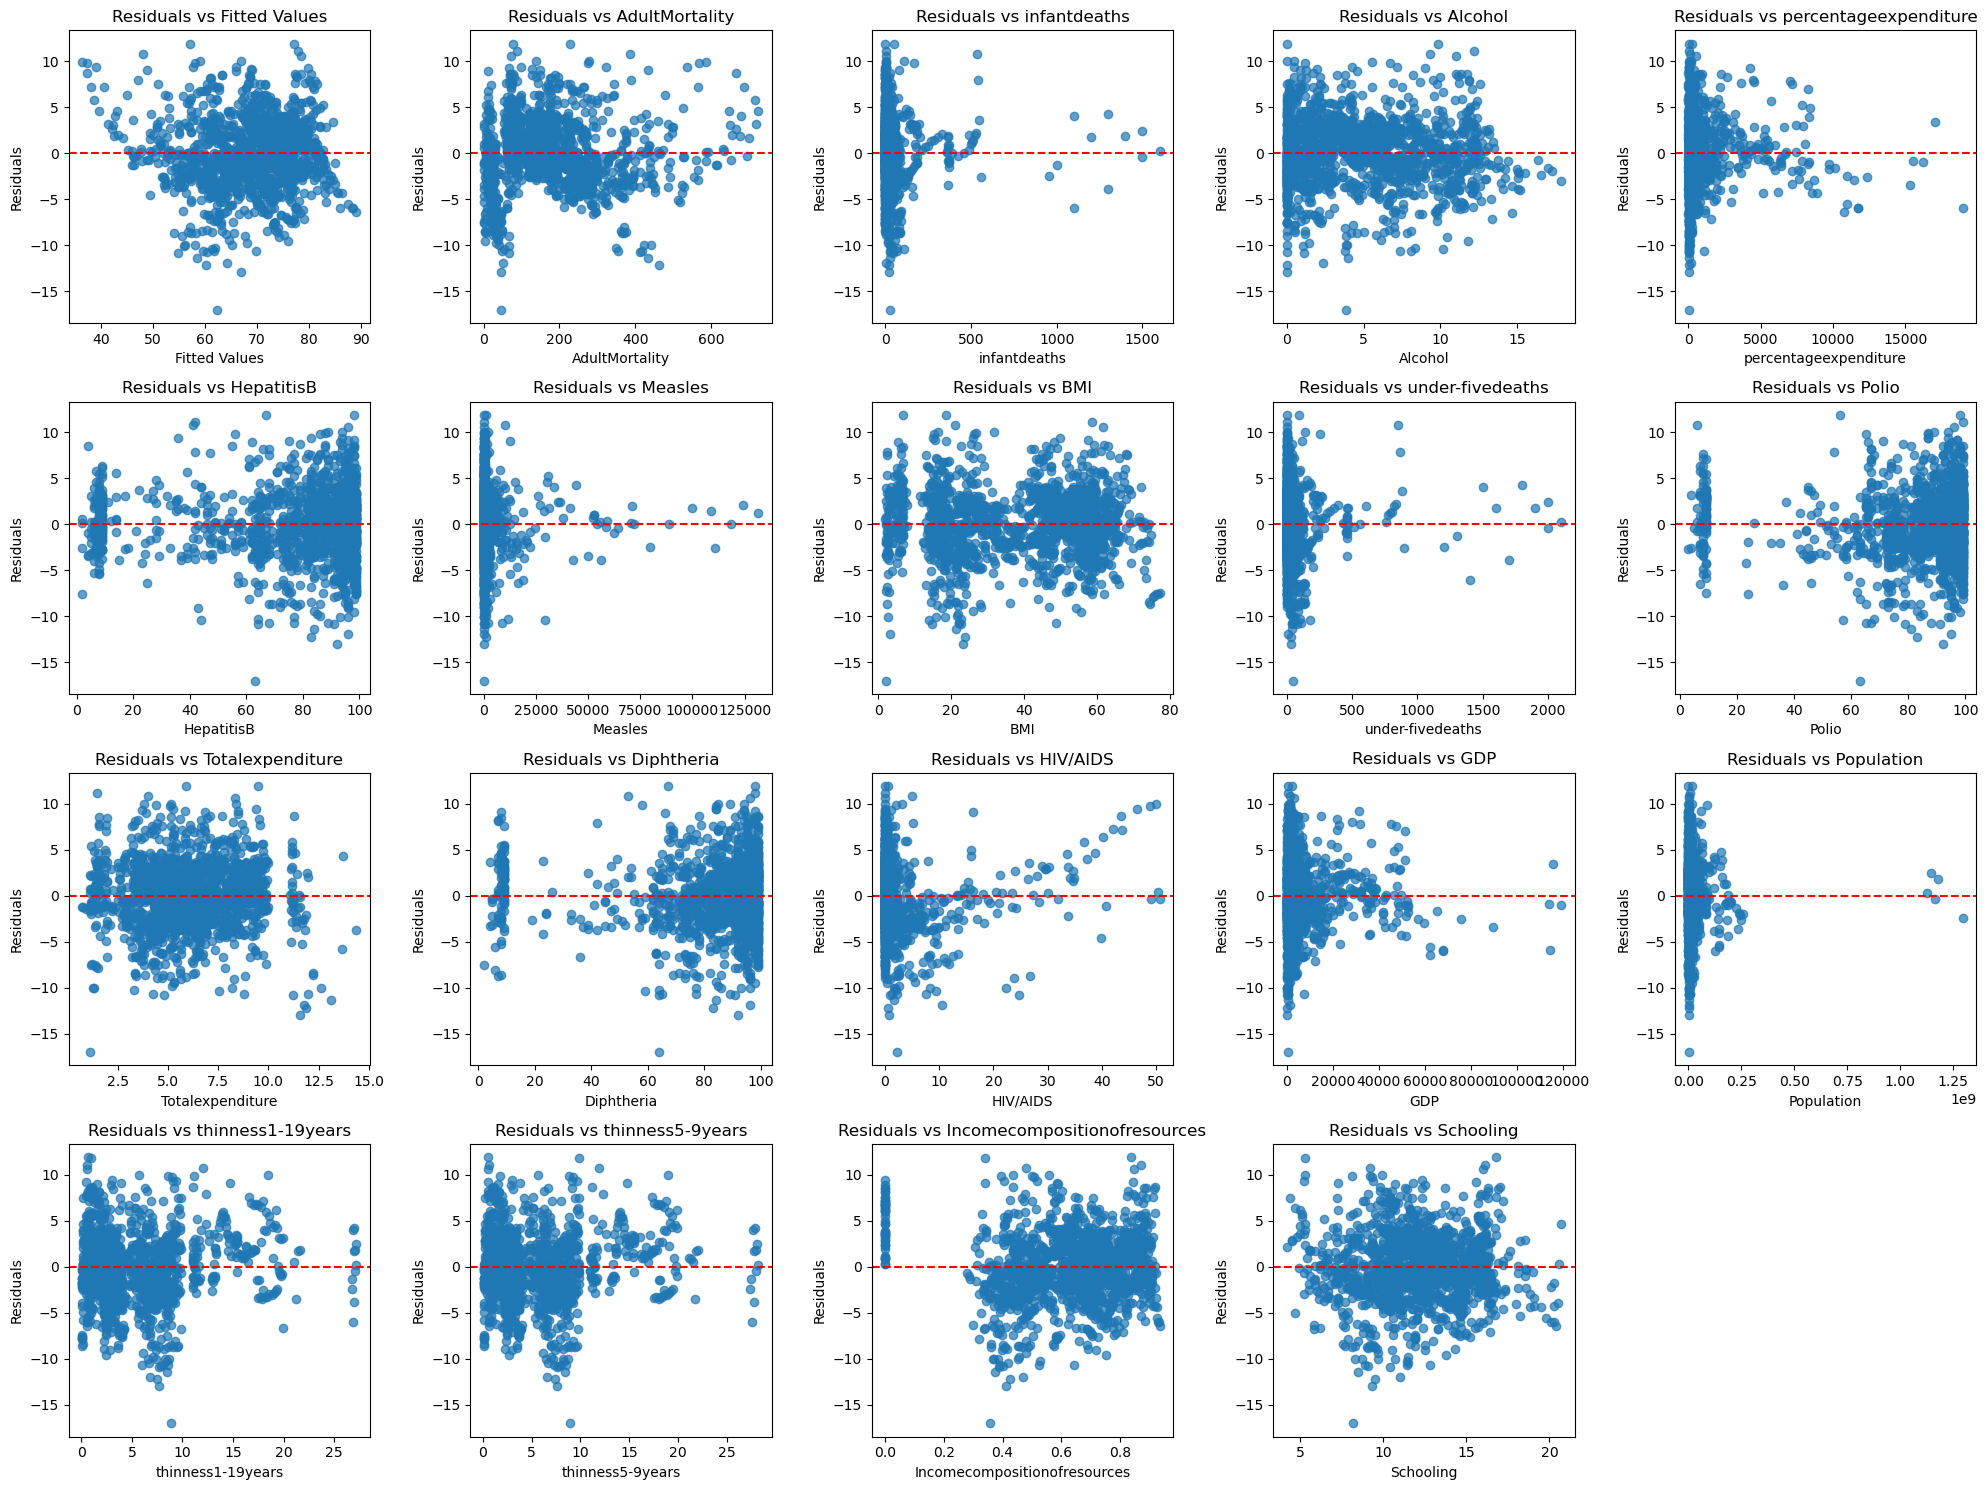

In [51]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

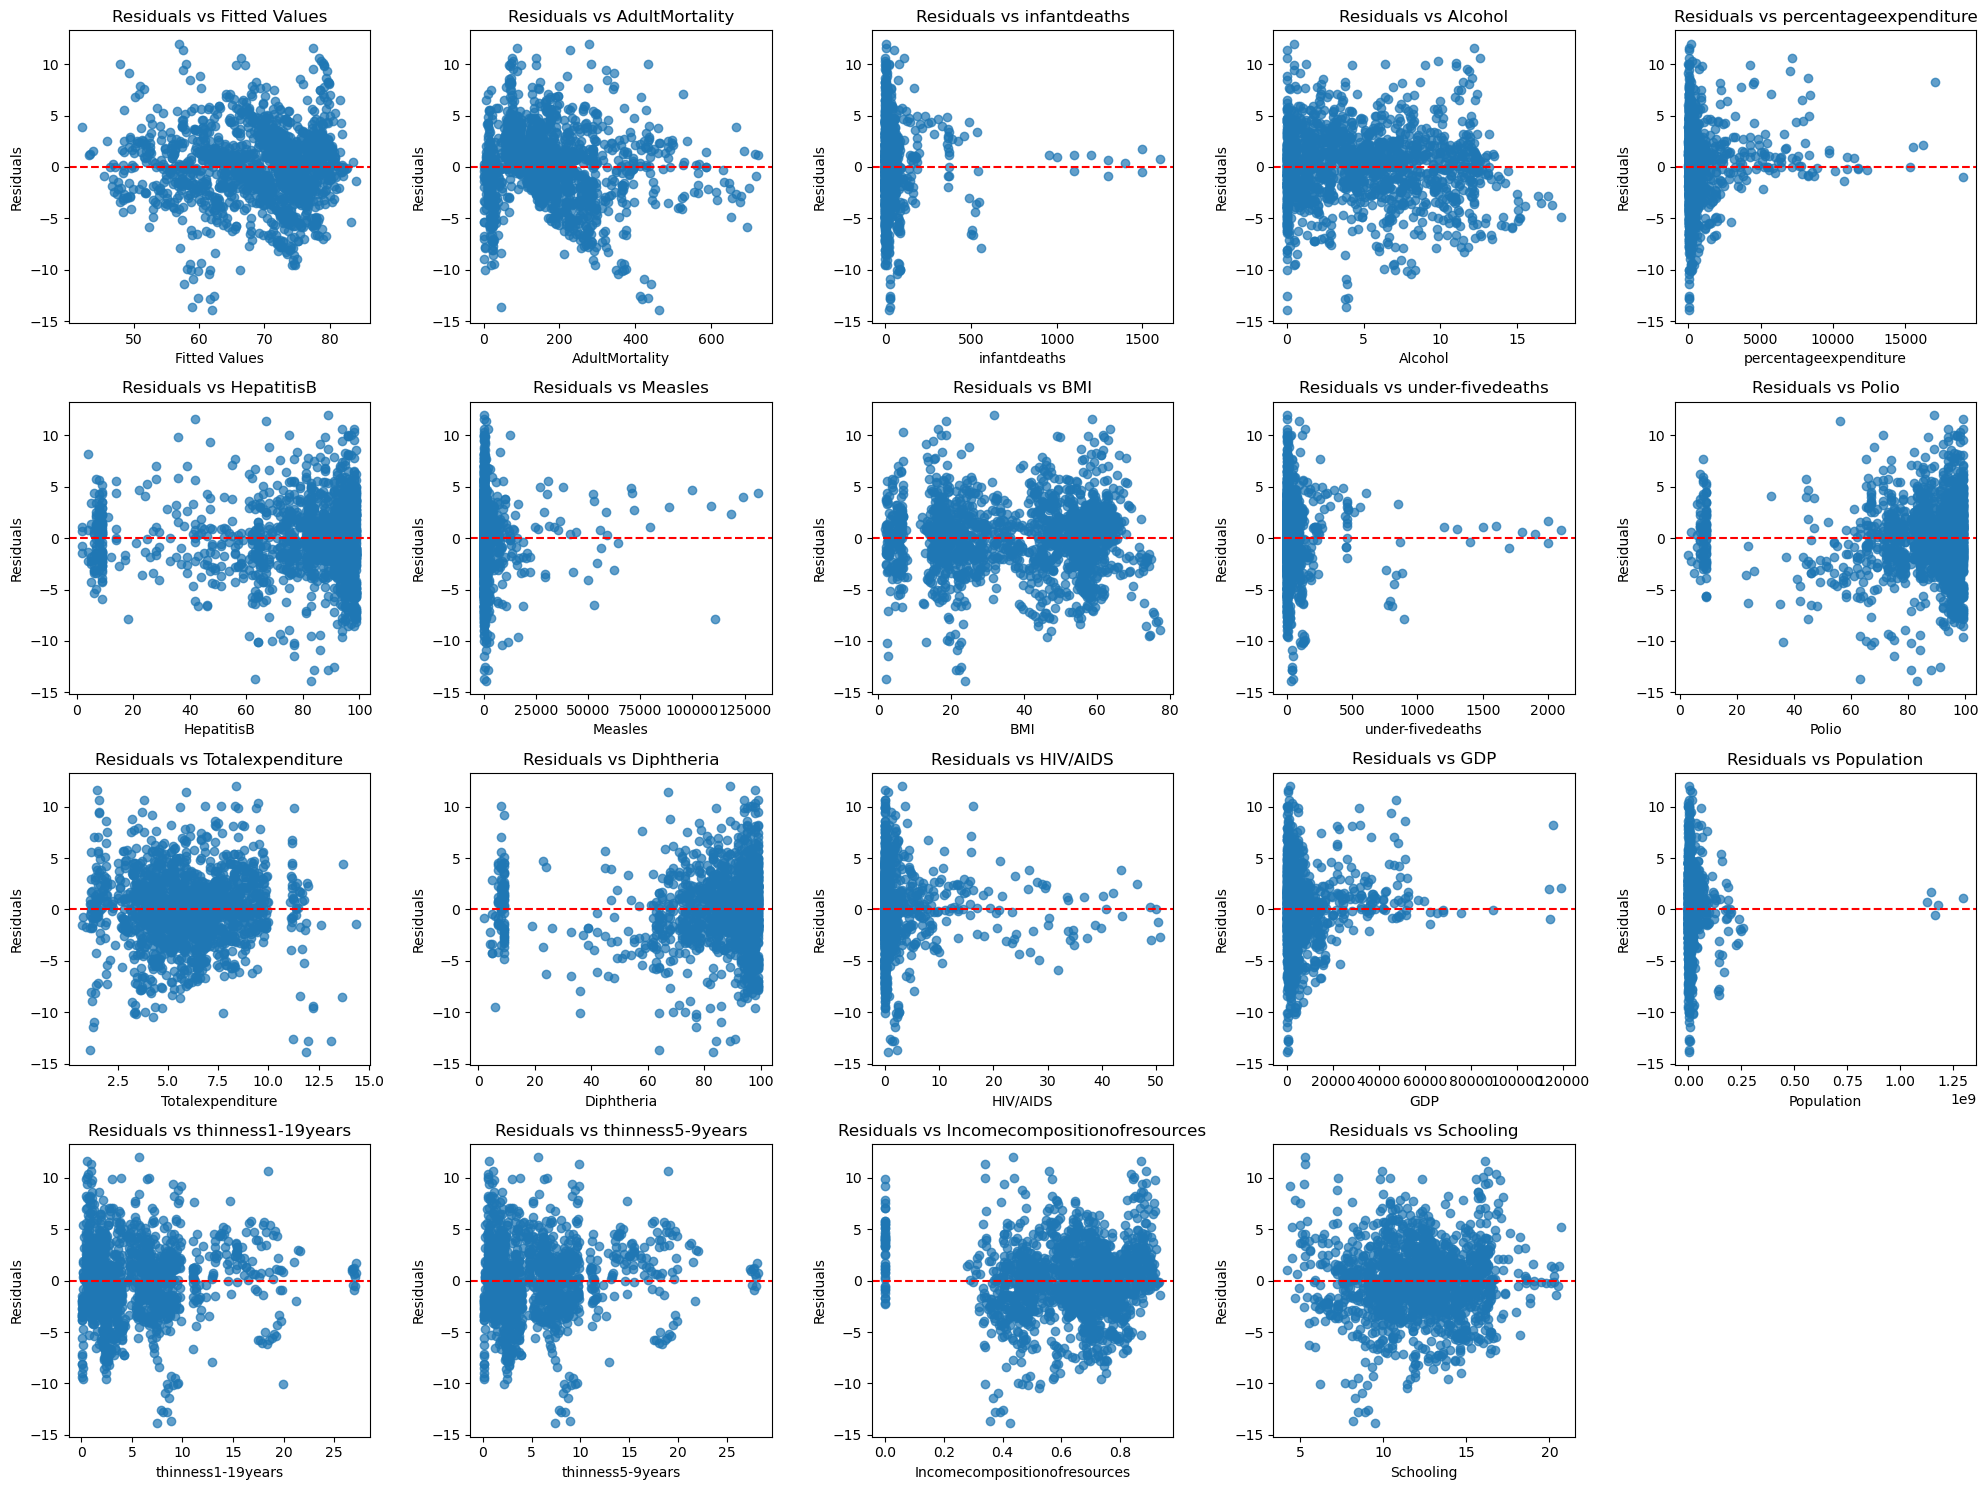

In [52]:
X = df[predictors]
y = df[response]

# Apply transformations
# Log transformation (avoid log(0) by adding a small constant)
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.log1p(X_transformed[col])

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Fit the OLS model
model = sm.OLS(y, X_transformed).fit()

# Compute residuals
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

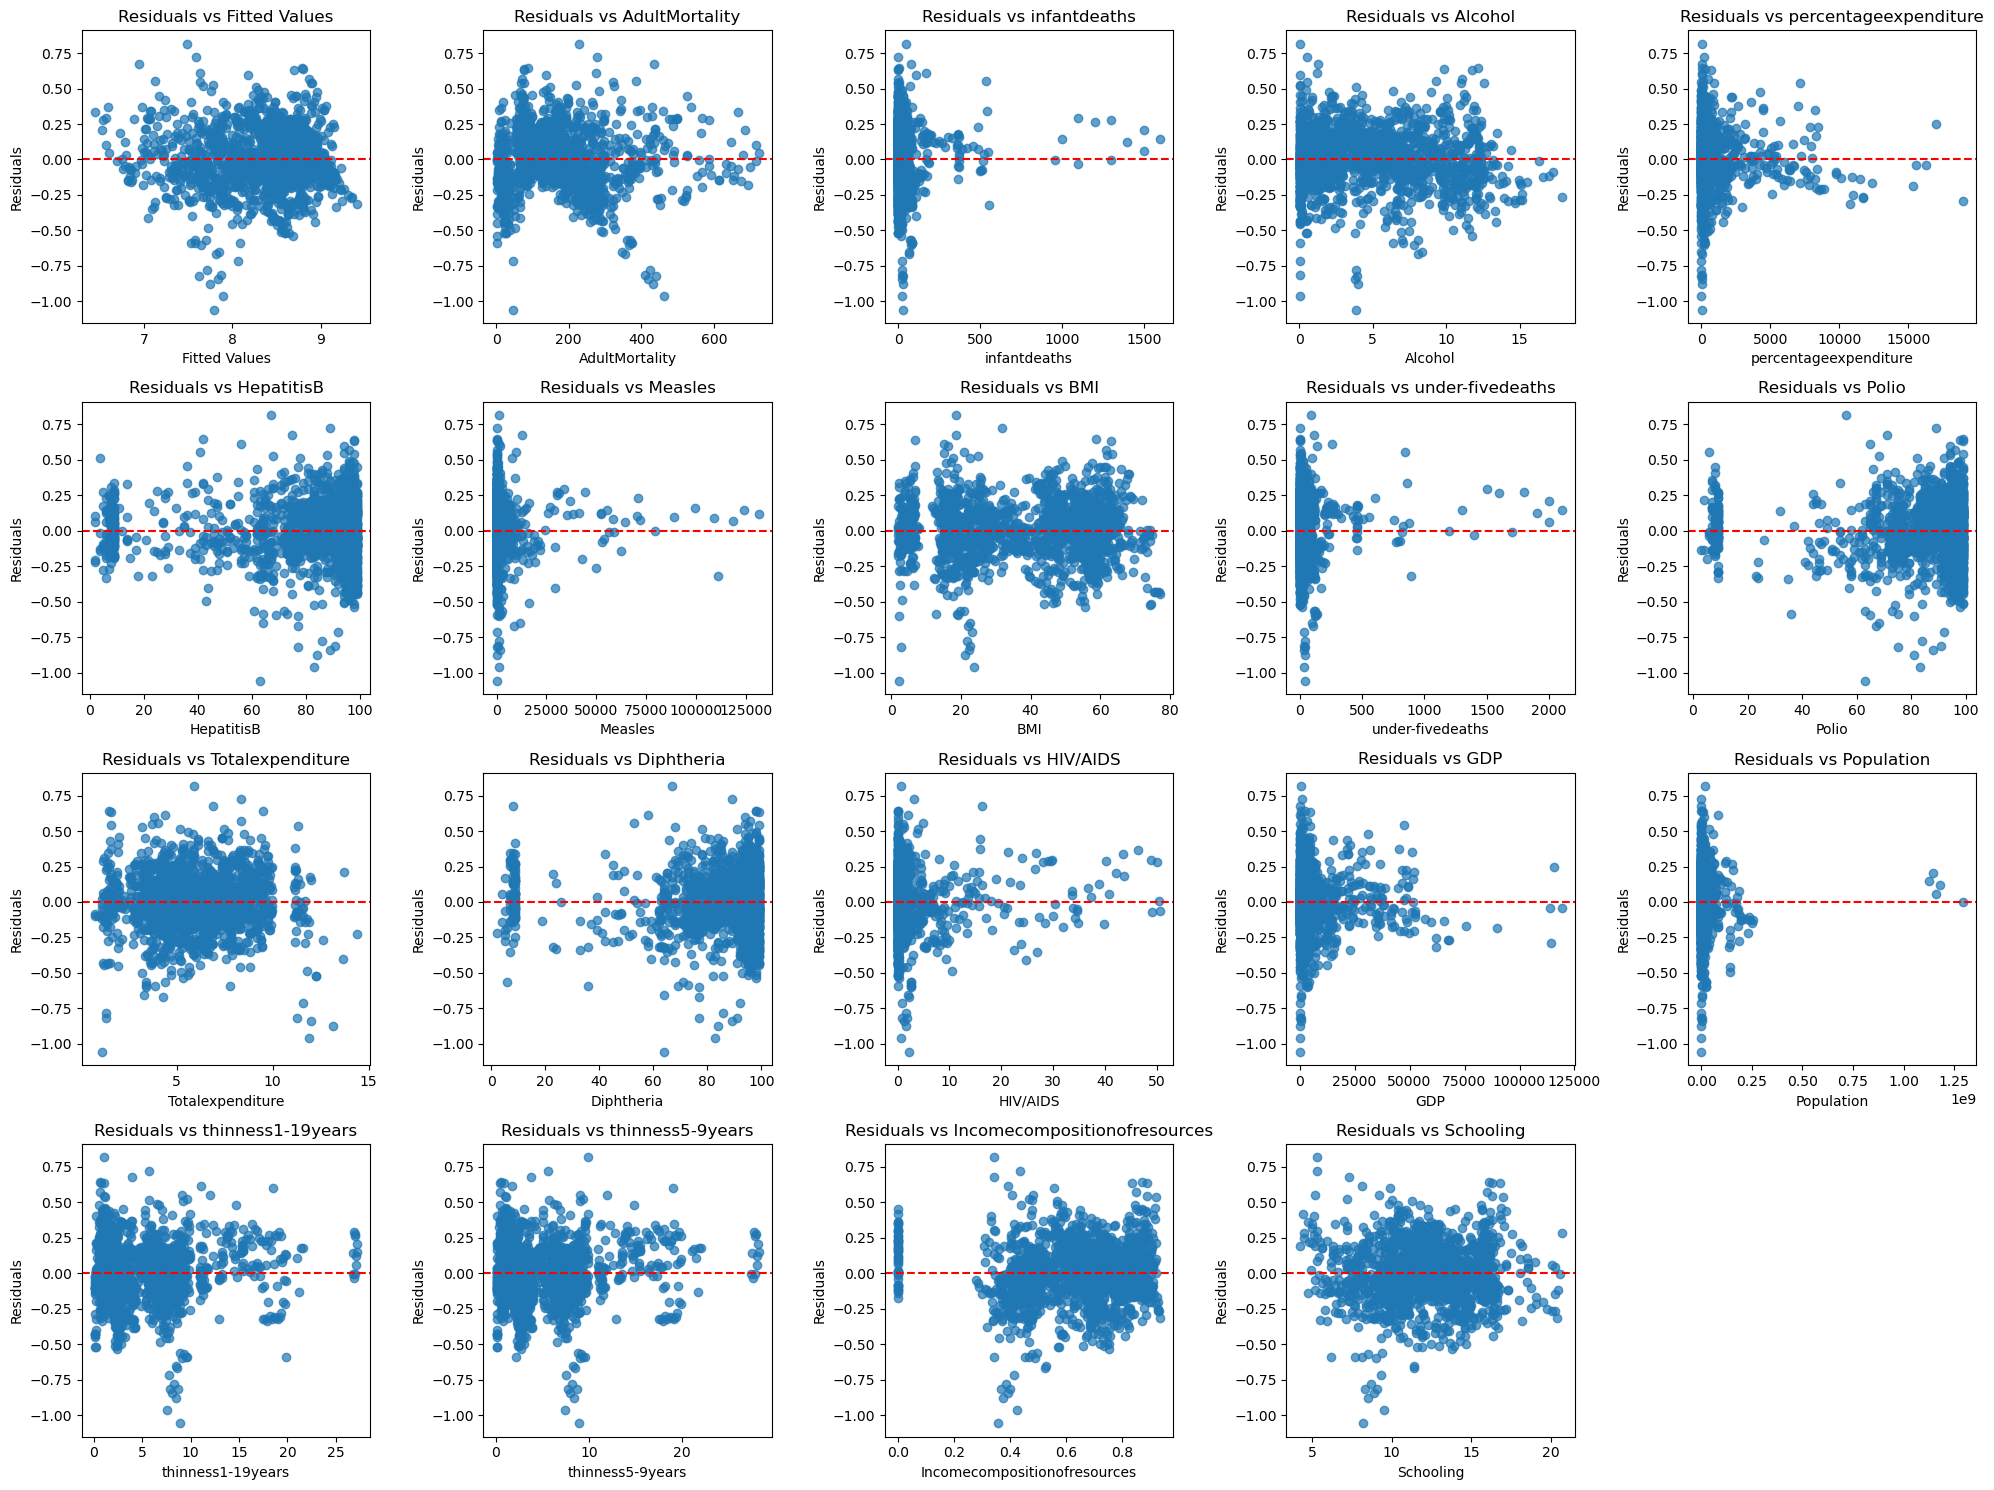

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     545.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:28:01   Log-Likelihood:                 274.51
No. Observations:                1649   AIC:                            -511.0
Df Residuals:                    1630   BIC:                            -408.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [53]:
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

y_transformed = np.sqrt(y)

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Fit the OLS model
model_sqrt = sm.OLS(y_transformed, X_transformed).fit()

# Compute residuals
residuals = model_sqrt.resid
fitted_values = model_sqrt.fittedvalues

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()
print(model_sqrt.summary())

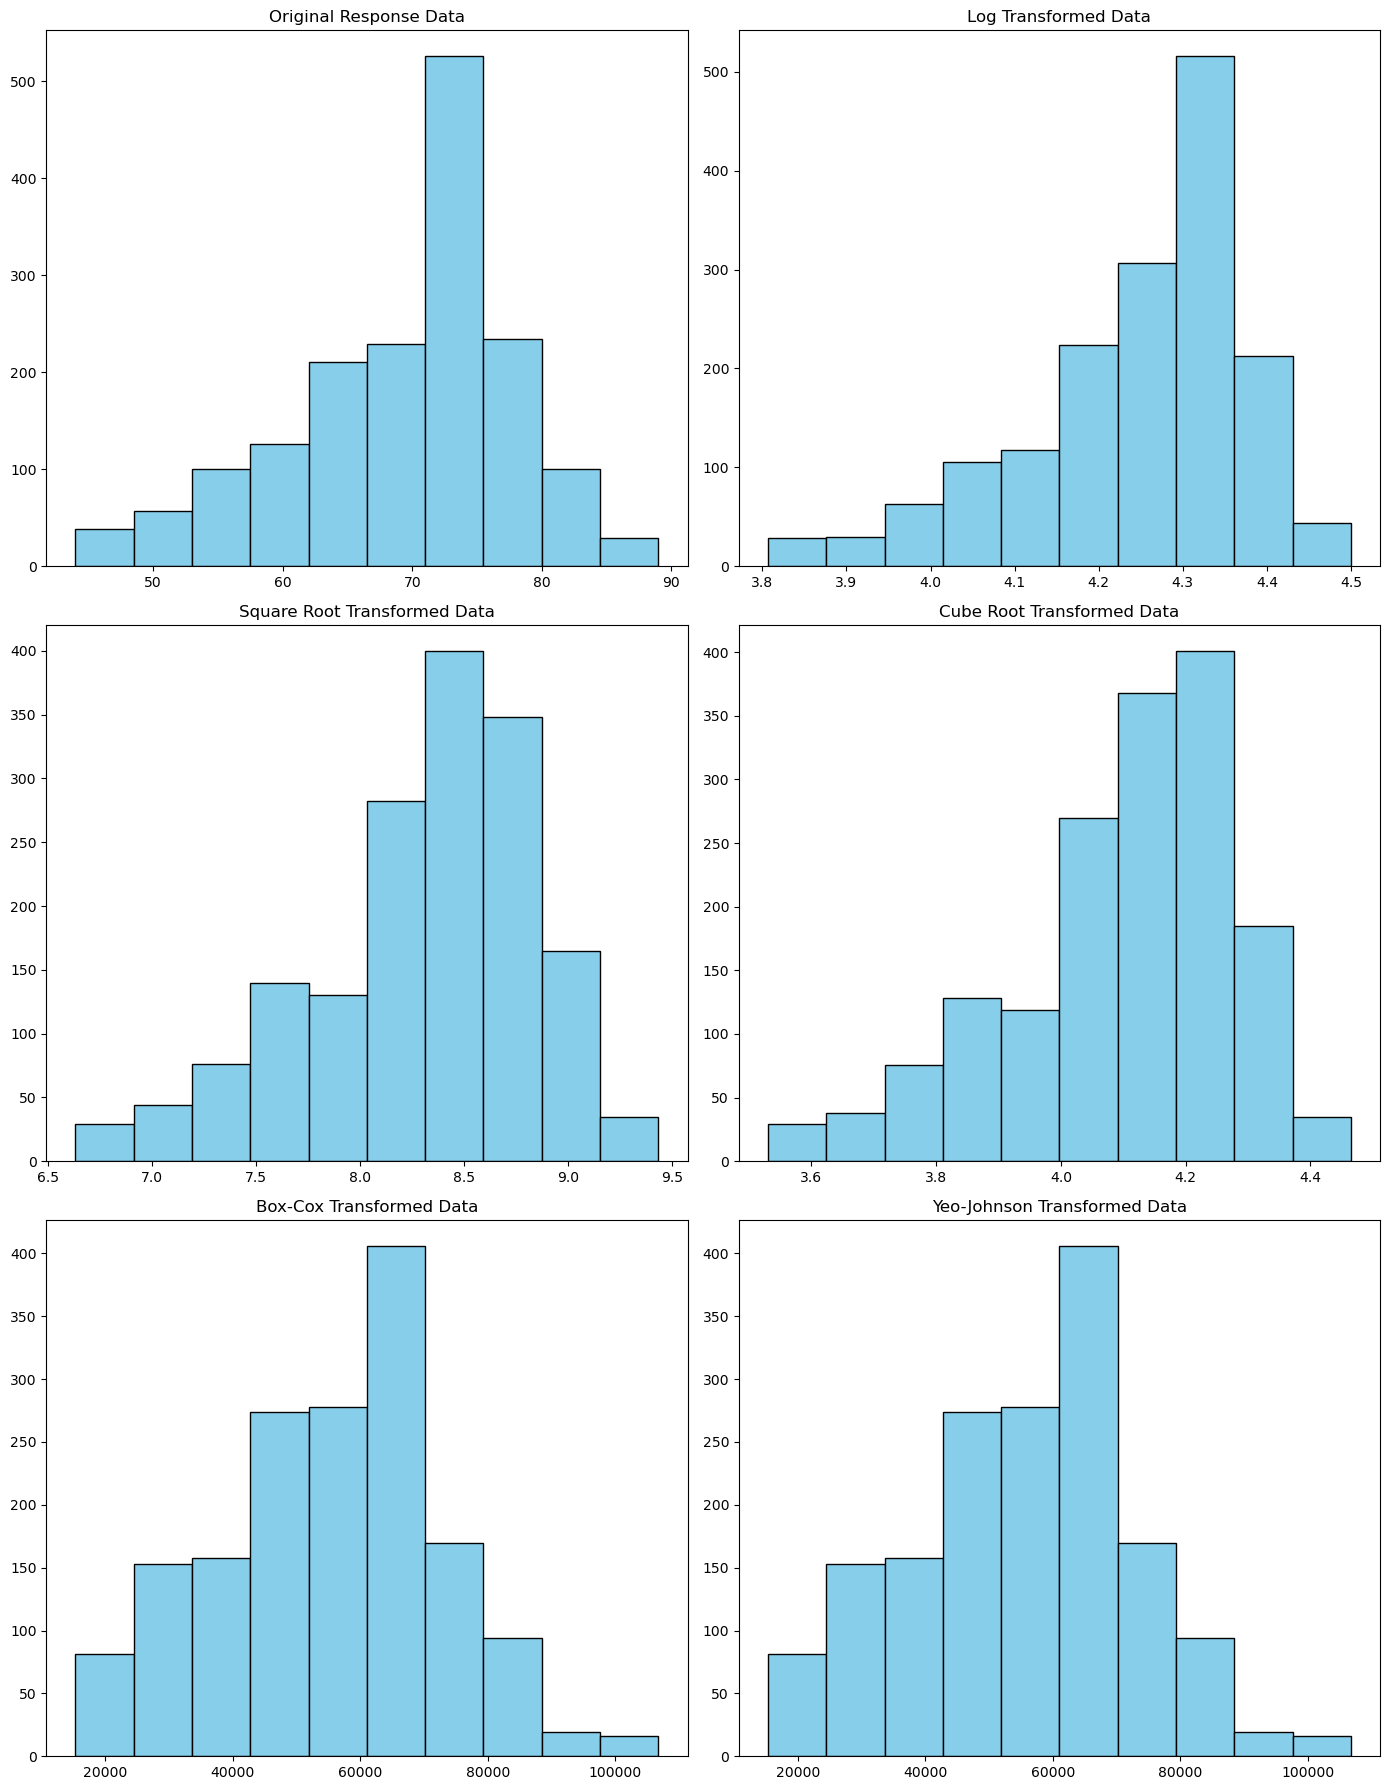

In [33]:
response = 'Lifeexpectancy'
df['log_transformed'] = np.log1p(df[response])  # log1p(x) = log(x + 1)

# Apply Square Root Transformation
df['sqrt_transformed'] = np.sqrt(df[response])

# Apply Cube Root Transformation
df['cbrt_transformed'] = np.cbrt(df[response])

# Apply Box-Cox Transformation
df['boxcox_transformed'], _ = stats.boxcox(df[response] + 1)  # Adding 1 to avoid zero values

# Apply Yeo-Johnson Transformation
df['yeojohnson_transformed'], _ = stats.yeojohnson(df[response])

# Plot original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Original Data Histogram
axes[0, 0].hist(df[response], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Response Data')

# Log Transformed Histogram
axes[0, 1].hist(df['log_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Log Transformed Data')

# Square Root Transformed Histogram
axes[1, 0].hist(df['sqrt_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Square Root Transformed Data')

# Cube Root Transformed Histogram
axes[1, 1].hist(df['cbrt_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Cube Root Transformed Data')

# Box-Cox Transformed Histogram
axes[2, 0].hist(df['boxcox_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[2, 0].set_title('Box-Cox Transformed Data')

# Yeo-Johnson Transformed Histogram
axes[2, 1].hist(df['yeojohnson_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[2, 1].set_title('Yeo-Johnson Transformed Data')

# Adjust layout
plt.tight_layout()
plt.show()

Logit transformation is not suitable for this data range.
ArcTanh transformation is not suitable for this data range.


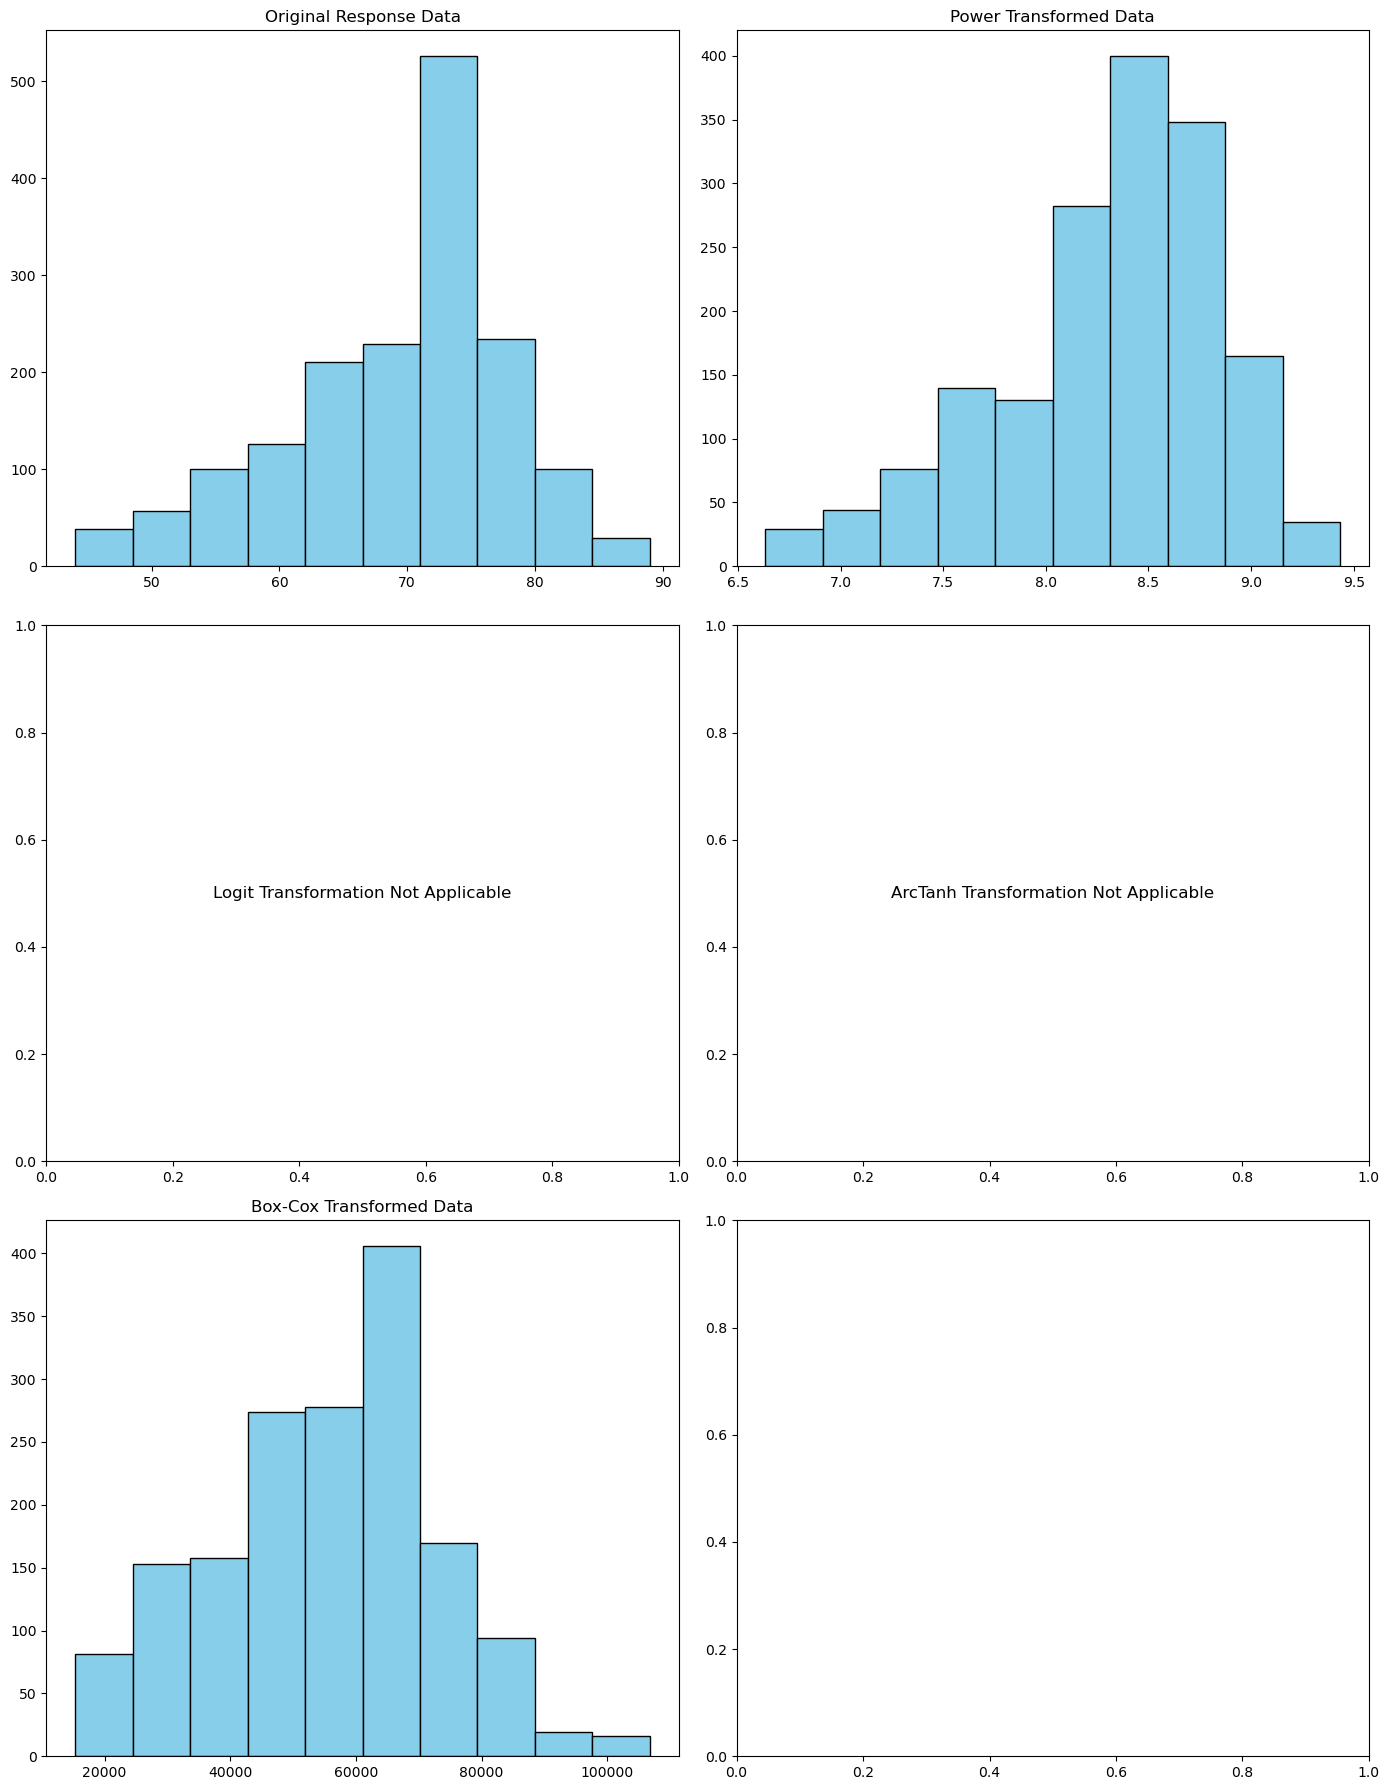

In [34]:
df['power_transformed'] = df[response] ** 0.5

# Apply Logit Transformation (for values between 0 and 1)
# Ensure the data is between 0 and 1 for logit transformation
if df[response].min() > 0 and df[response].max() < 1:
    df['logit_transformed'] = np.log(df[response] / (1 - df[response]))
else:
    print("Logit transformation is not suitable for this data range.")

# Apply ArcTanh Transformation (for values between -1 and 1)
# Ensure the data is within this range
if df[response].min() > -1 and df[response].max() < 1:
    df['arctanh_transformed'] = 0.5 * np.log((1 + df[response]) / (1 - df[response]))
else:
    print("ArcTanh transformation is not suitable for this data range.")

# Apply Box-Cox Transformation with a lambda parameter of 0.5
# Add a small constant to handle zeros
df['boxcox_transformed'], _ = stats.boxcox(df[response] + 1)  # Adding 1 to avoid zero values

# Plot original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Original Data Histogram
axes[0, 0].hist(df[response], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Response Data')

# Power Transformed Histogram
axes[0, 1].hist(df['power_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Power Transformed Data')

# Logit Transformed Histogram (if applicable)
if 'logit_transformed' in df.columns:
    axes[1, 0].hist(df['logit_transformed'], bins=10, color='skyblue', edgecolor='black')
    axes[1, 0].set_title('Logit Transformed Data')
else:
    axes[1, 0].text(0.5, 0.5, 'Logit Transformation Not Applicable', ha='center', va='center', fontsize=12)

# ArcTanh Transformed Histogram (if applicable)
if 'arctanh_transformed' in df.columns:
    axes[1, 1].hist(df['arctanh_transformed'], bins=10, color='skyblue', edgecolor='black')
    axes[1, 1].set_title('ArcTanh Transformed Data')
else:
    axes[1, 1].text(0.5, 0.5, 'ArcTanh Transformation Not Applicable', ha='center', va='center', fontsize=12)

# Box-Cox Transformed Histogram
axes[2, 0].hist(df['boxcox_transformed'], bins=10, color='skyblue', edgecolor='black')
axes[2, 0].set_title('Box-Cox Transformed Data')

# Adjust layout
plt.tight_layout()
plt.show()

# Normality of Residuals

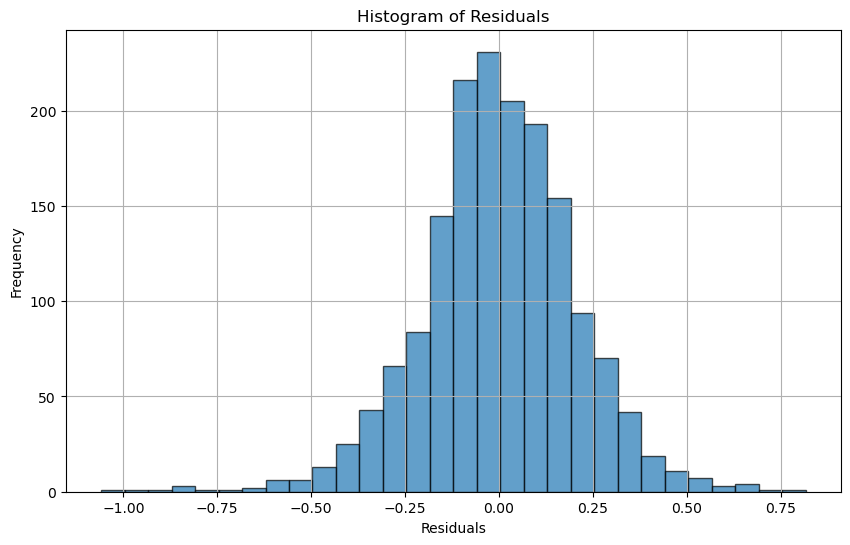

In [37]:
import matplotlib.pyplot as plt

# Extract residuals from the log-transformed model
residuals_sqrt = model_sqrt.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_sqrt, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

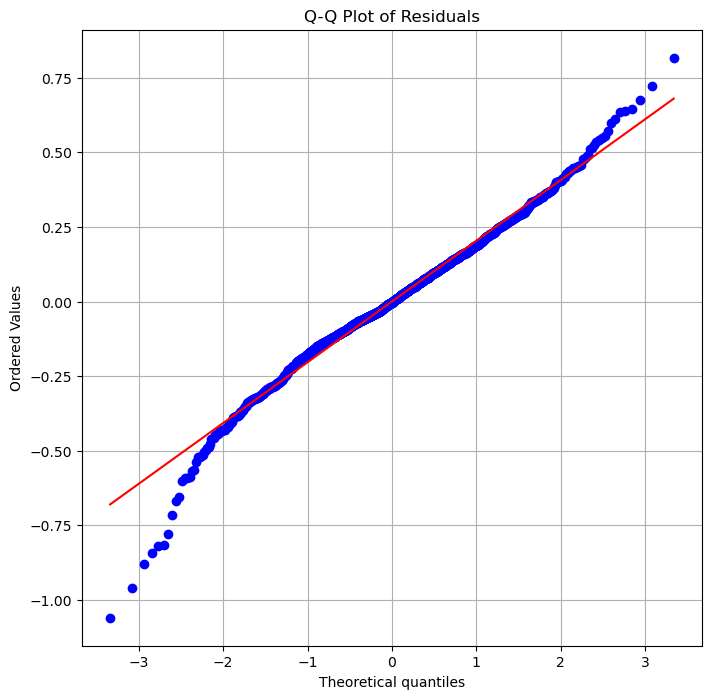

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract residuals from the log-transformed model
residuals_sqrt = model_sqrt.resid

# Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(residuals_sqrt, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

In [39]:
import scipy.stats as stats

# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(residuals_sqrt)

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals seem to come from a normal distribution (fail to reject H0).")
else:
    print("The residuals do not seem to come from a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9848
P-Value: 0.0000
The residuals do not seem to come from a normal distribution (reject H0).


                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     545.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:35:42   Log-Likelihood:                -732.16
No. Observations:                1649   AIC:                             1502.
Df Residuals:                    1630   BIC:                             1605.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

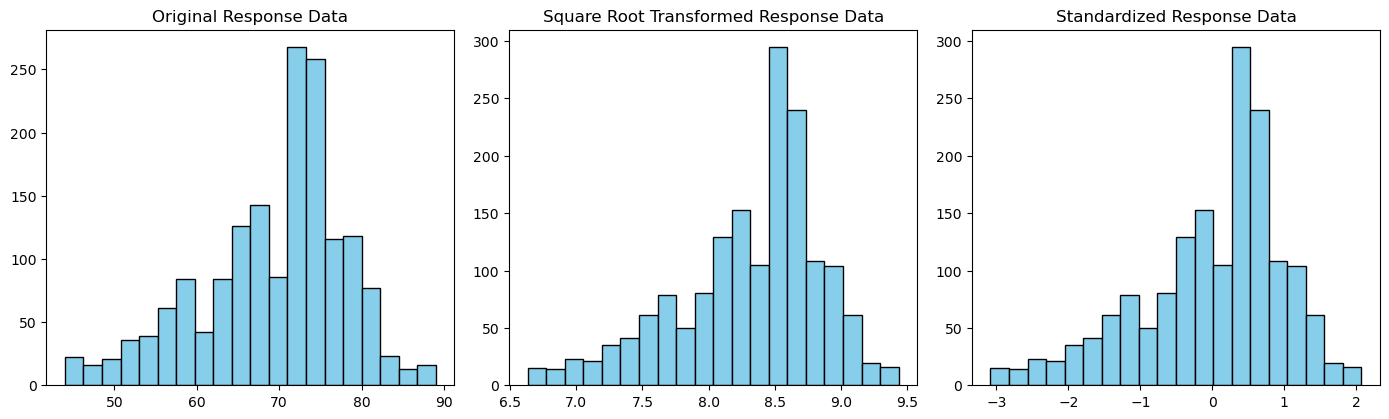

In [56]:
X = df[predictors]
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

# Apply square root transformation to response
y = df[response]
y_transformed = np.sqrt(y)

# Standardize the transformed variables (y and X)
# Calculate mean and std for y and X
mu_y = y_transformed.mean()
sigma_y = y_transformed.std()
mu_X = X_transformed.mean()
sigma_X = X_transformed.std()

# Standardize y
y_standardized = (y_transformed - mu_y) / sigma_y

# Standardize X
X_standardized = (X_transformed - mu_X) / sigma_X

# Add constant to predictors
X_standardized = sm.add_constant(X_standardized)

# Fit the OLS model on standardized data
model = sm.OLS(y_standardized, X_standardized).fit()

# Print model summary
print(model.summary())

# Plot histograms of transformed and standardized data
plt.figure(figsize=(14, 8))

# Original Response Data
plt.subplot(2, 3, 1)
plt.hist(df[response], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Response Data')

# Square Root Transformed Response Data
plt.subplot(2, 3, 2)
plt.hist(y_transformed, bins=20, color='skyblue', edgecolor='black')
plt.title('Square Root Transformed Response Data')

# Standardized Response Data
plt.subplot(2, 3, 3)
plt.hist(y_standardized, bins=20, color='skyblue', edgecolor='black')
plt.title('Standardized Response Data')


plt.tight_layout()
plt.show()

# Homo Scedasticity

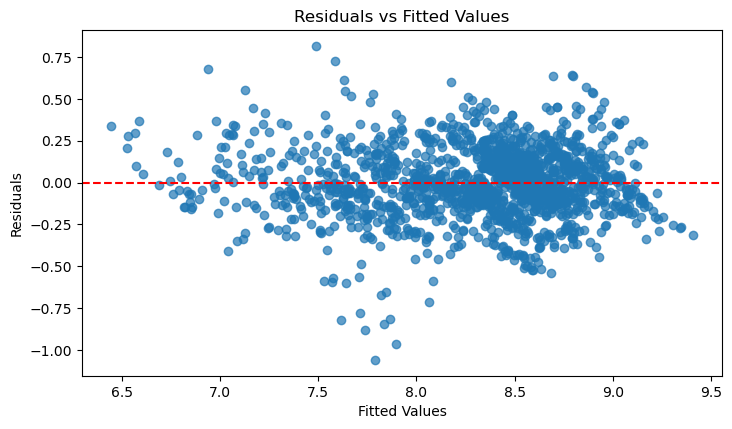

In [60]:
residuals = model_sqrt.resid
fitted_values = model_sqrt.fittedvalues

# Create residual plots
plt.figure(figsize=(14, 8))

# Plot residuals vs fitted values
plt.subplot(2, 2, 1)
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')


plt.tight_layout()
plt.show()

# Multicolinearity

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


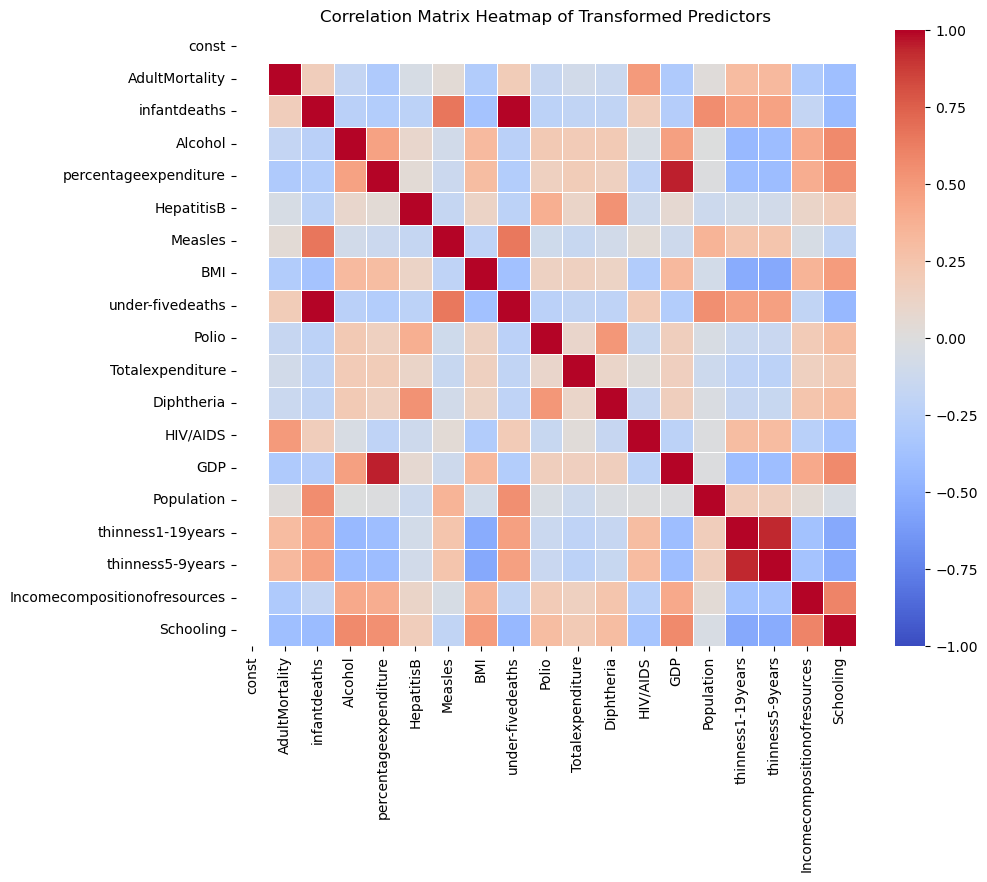

In [62]:
import seaborn as sns
X = df[predictors]
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Compute the correlation matrix of the transformed predictors
corr_matrix = X_transformed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Transformed Predictors')
plt.show()

In [63]:
X = df[predictors]
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Compute the correlation matrix of the transformed predictors
corr_matrix = X_transformed.corr()

# Print the correlation matrix as a table
print("Correlation Matrix of Transformed Predictors:")
print(corr_matrix)

Correlation Matrix of Transformed Predictors:
                              const  AdultMortality  infantdeaths   Alcohol  \
const                           NaN             NaN           NaN       NaN   
AdultMortality                  NaN        1.000000      0.173322 -0.173896   
infantdeaths                    NaN        0.173322      1.000000 -0.237713   
Alcohol                         NaN       -0.173896     -0.237713  1.000000   
percentageexpenditure           NaN       -0.297602     -0.277434  0.456175   
HepatitisB                      NaN       -0.054109     -0.219744  0.092486   
Measles                         NaN        0.043338      0.661727 -0.088532   
BMI                             NaN       -0.288492     -0.362411  0.315698   
under-fivedeaths                NaN        0.192864      0.997027 -0.235088   
Polio                           NaN       -0.157397     -0.221542  0.211475   
Totalexpenditure                NaN       -0.090986     -0.189245  0.202918   
Diphth

In [65]:
X = df[predictors]
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Compute VIF for each predictor
# VIF = 1 / (1 - R^2) where R^2 is the R-squared value of the predictor as a function of other predictors
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [sm.OLS(X[col], sm.add_constant(X.drop(col, axis=1))).fit().rsquared for col in X.columns]
    vif_data["VIF"] = 1 / (1 - vif_data["VIF"])
    return vif_data

vif_result = calculate_vif(X_transformed)

vif_result_sorted = vif_result.sort_values(by="VIF", ascending=False)

# Print the sorted VIF results
print("Variance Inflation Factor (VIF) for each predictor (sorted in decreasing order):")
print(vif_result_sorted)

Variance Inflation Factor (VIF) for each predictor (sorted in decreasing order):
                        Variable         VIF
2                   infantdeaths  232.249311
8               under-fivedeaths  230.550113
13                           GDP   11.320525
4          percentageexpenditure   10.999108
16              thinness5-9years    8.028576
15             thinness1-19years    8.027566
18                     Schooling    3.033072
6                        Measles    1.878793
3                        Alcohol    1.813582
11                    Diphtheria    1.758064
17  Incomecompositionofresources    1.659123
14                    Population    1.624049
7                            BMI    1.606341
12                      HIV/AIDS    1.600066
5                     HepatitisB    1.500998
1                 AdultMortality    1.491780
9                          Polio    1.467567
10              Totalexpenditure    1.128600
0                          const    0.000000


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


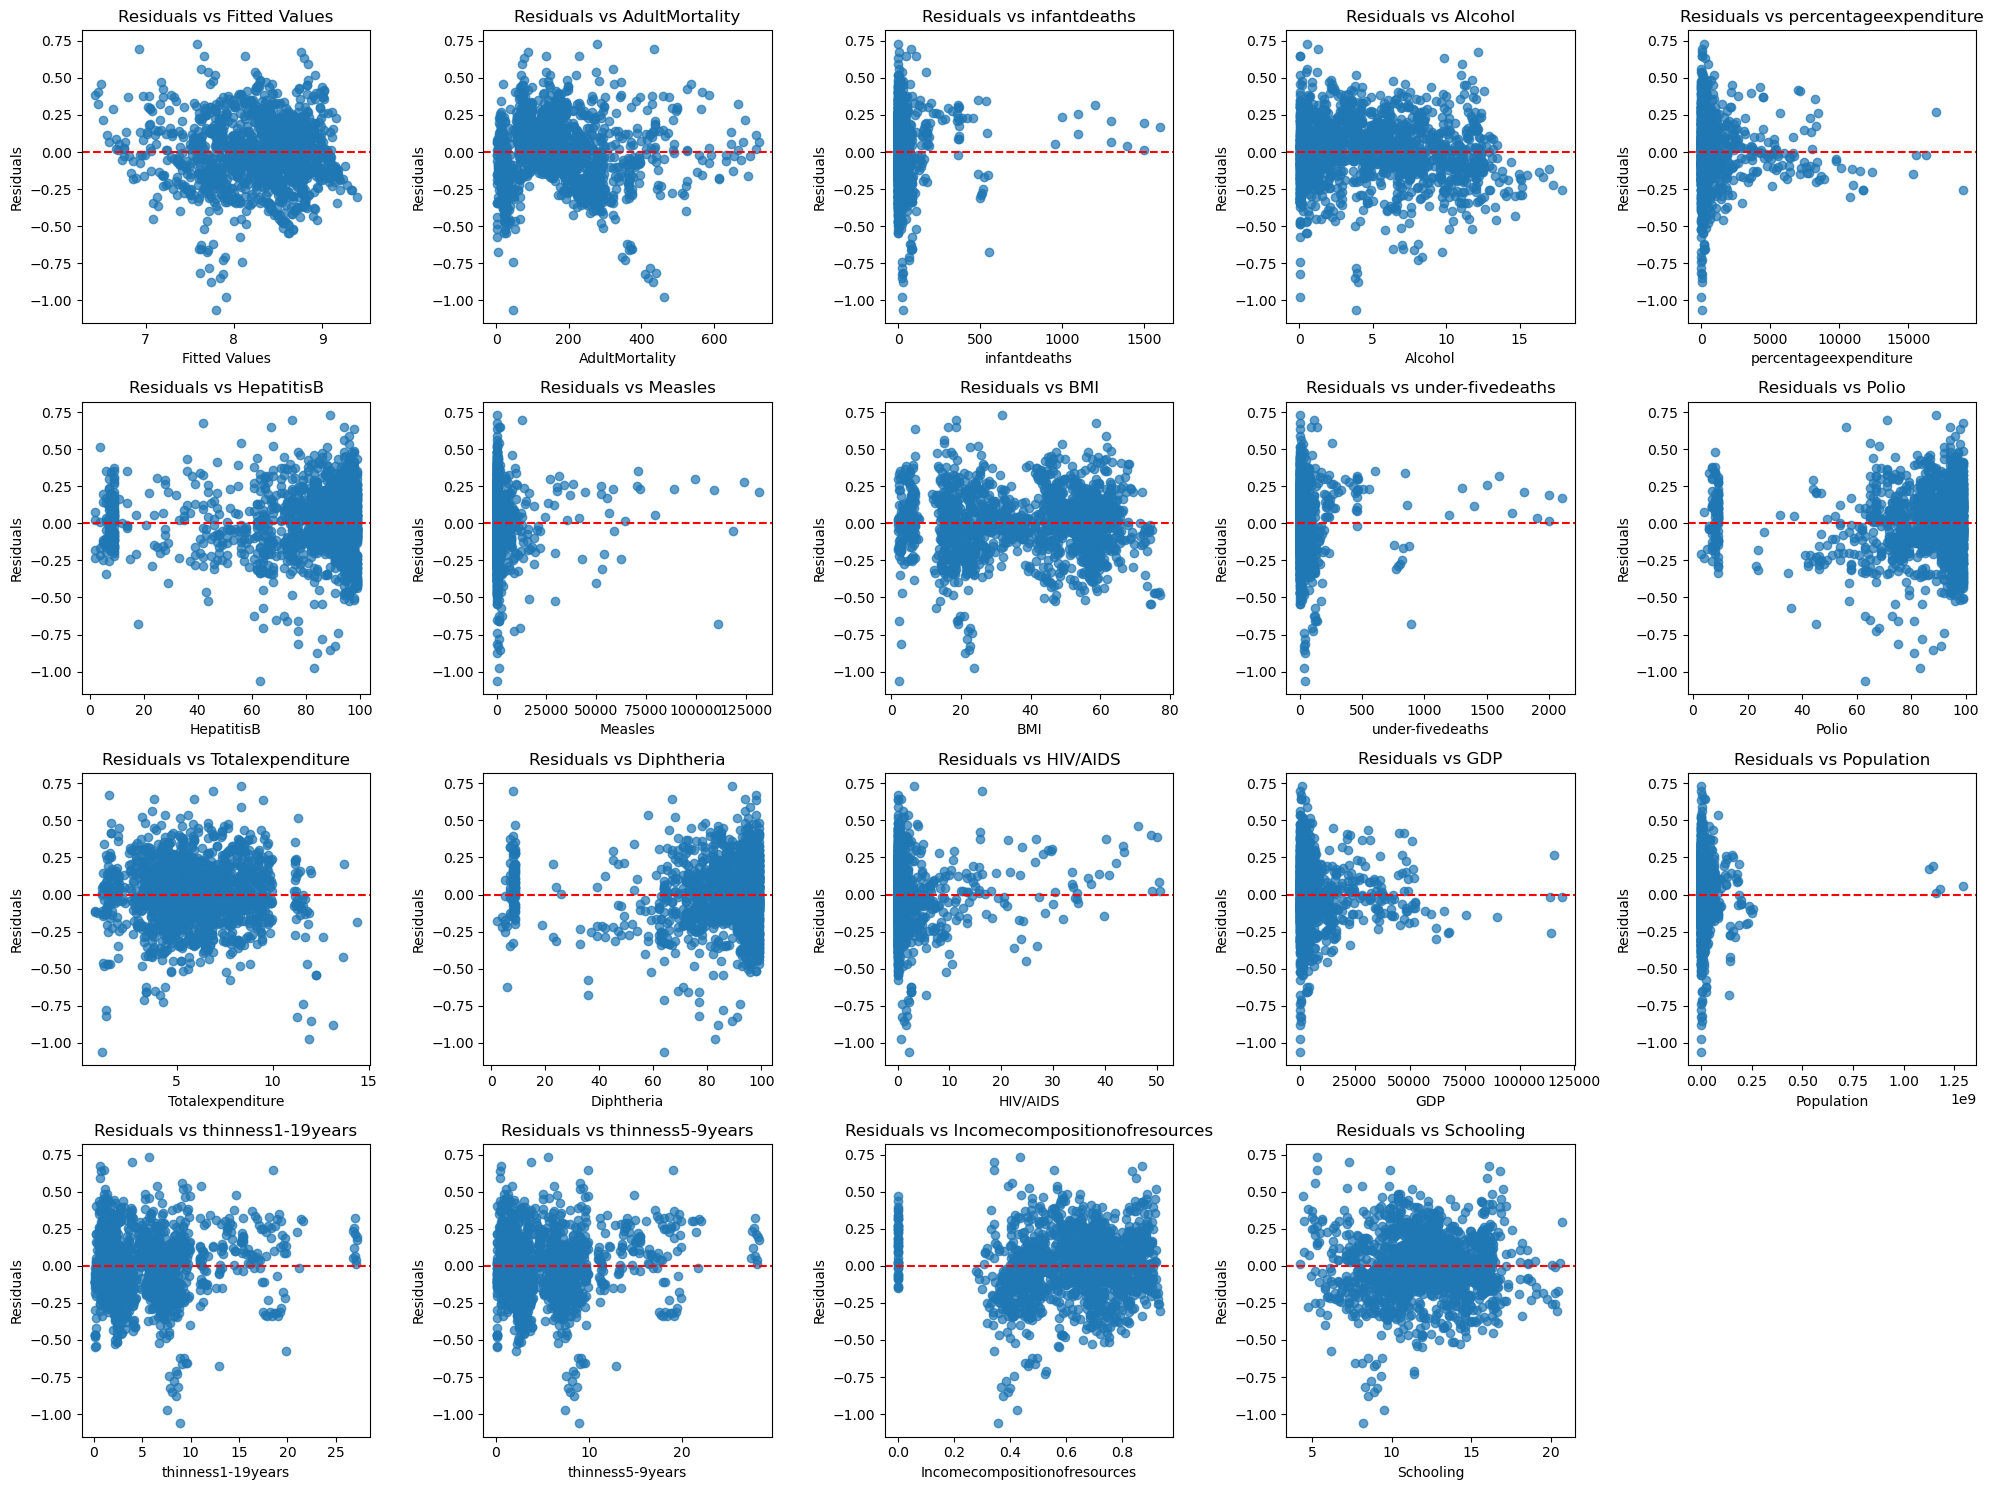

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     575.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:15:07   Log-Likelihood:                 228.55
No. Observations:                1649   AIC:                            -423.1
Df Residuals:                    1632   BIC:                            -331.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
response1 = 'Lifeexpectancy'
predictors1 =  [
    'AdultMortality', 'Alcohol', 'percentageexpenditure',
    'HepatitisB', 'Measles', 'BMI', 'Polio','under-fivedeaths',
    'Totalexpenditure', 'Diphtheria', 'HIV/AIDS',  'Population',
    'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling'
]
X = df[predictors1]
y = df[response1]

X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

y_transformed = np.sqrt(y)

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Fit the OLS model
model_sqrt = sm.OLS(y_transformed, X_transformed).fit()

# Compute residuals
residuals = model_sqrt.resid
fitted_values = model_sqrt.fittedvalues

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()
print(model_sqrt.summary())

In [70]:
X = df[predictors1]
X_transformed = X.copy()
for col in X_transformed.columns:
    X_transformed[col] = np.sqrt(X_transformed[col])

# Add a constant term to the predictors (for the intercept)
X_transformed = sm.add_constant(X_transformed)

# Compute VIF for each predictor
# VIF = 1 / (1 - R^2) where R^2 is the R-squared value of the predictor as a function of other predictors
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [sm.OLS(X[col], sm.add_constant(X.drop(col, axis=1))).fit().rsquared for col in X.columns]
    vif_data["VIF"] = 1 / (1 - vif_data["VIF"])
    return vif_data

vif_result = calculate_vif(X_transformed)

vif_result_sorted = vif_result.sort_values(by="VIF", ascending=False)

# Print the sorted VIF results
print("Variance Inflation Factor (VIF) for each predictor (sorted in decreasing order):")
print(vif_result_sorted)

Variance Inflation Factor (VIF) for each predictor (sorted in decreasing order):
                        Variable       VIF
13             thinness1-19years  8.005060
14              thinness5-9years  8.001392
8               under-fivedeaths  3.134532
16                     Schooling  2.882081
5                        Measles  1.804510
10                    Diphtheria  1.746644
2                        Alcohol  1.745319
15  Incomecompositionofresources  1.656807
6                            BMI  1.593542
12                    Population  1.588623
3          percentageexpenditure  1.565052
11                      HIV/AIDS  1.527468
4                     HepatitisB  1.499337
1                 AdultMortality  1.486904
7                          Polio  1.463766
9               Totalexpenditure  1.116213
0                          const  0.000000


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
